# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#import os

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = np.shape(train['features'])[0]

# TODO: Number of testing examples.
n_test = np.shape(test['features'])[0]

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(X_train[0])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


## Shuffle & train-test split

In [4]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [5]:
X_validation=X_train[0:round(len(X_train)*0.2)][:][:][:]

In [6]:
y_validation=y_train[0:round(len(y_train)*0.2)]

In [7]:
X_train=X_train[round(len(X_train)*0.2):len(X_train)][:][:][:]

In [8]:
y_train=y_train[round(len(y_train)*0.2):len(y_train)]

In [9]:
# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_validation)

# TODO: Number of testing examples.
n_test = len(X_test)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)

Number of training examples = 31367
Number of validation examples = 7842
Number of testing examples = 12630


## Visualize Data

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [10]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

12
16
10
4
4
1
28
10
28
12


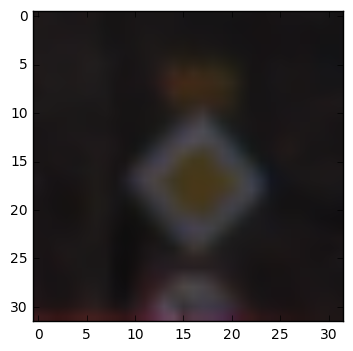

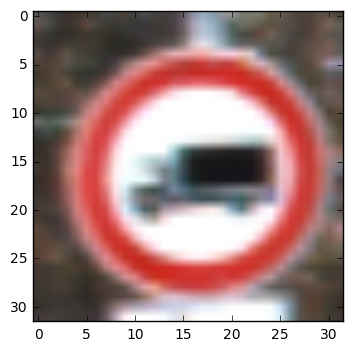

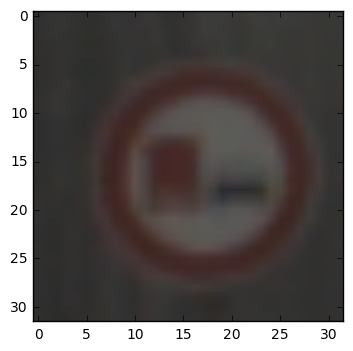

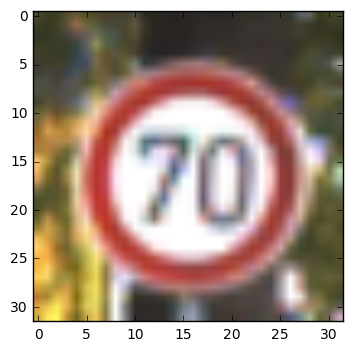

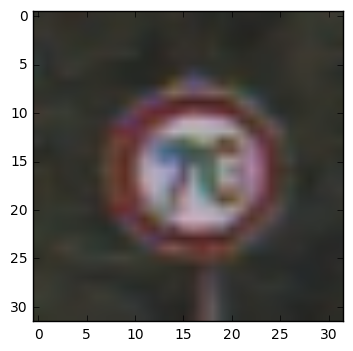

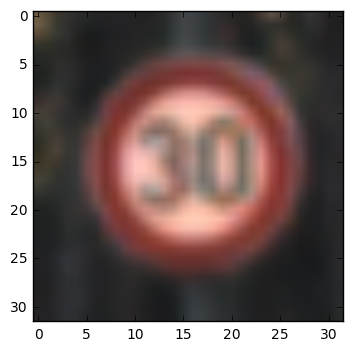

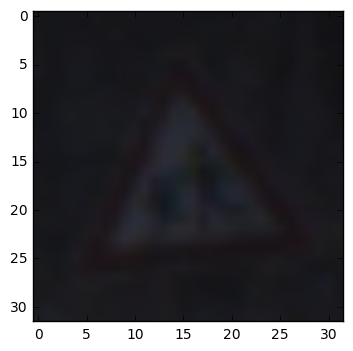

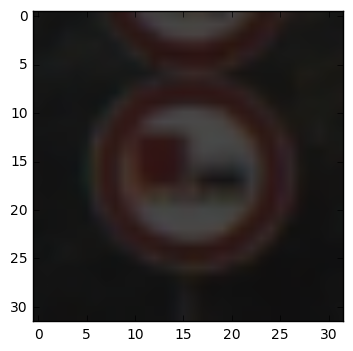

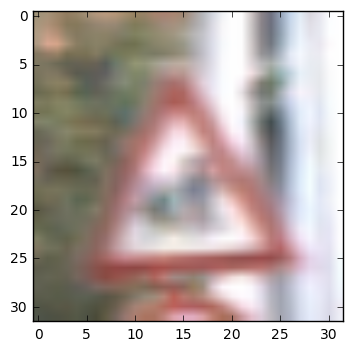

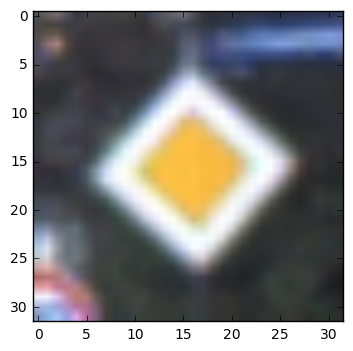

In [11]:
for i in range(10):
    plt.figure(i)
    plt.imshow(X_train[i].squeeze())
    print(y_train[i])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the second step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [12]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

In [13]:
def normalize(img):
    minV=np.min(img)
    maxV=np.max(img)
    imgN= (255*(img-minV))/(maxV-minV)
    return imgN

In [14]:
X_train_normal=[]
for i in range(len(X_train)):
    X_train_normal.append(normalize(X_train[i]))
X_train=X_train_normal

12
16
10
4
4
1
28
10
28
12


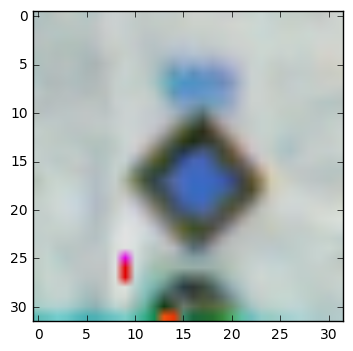

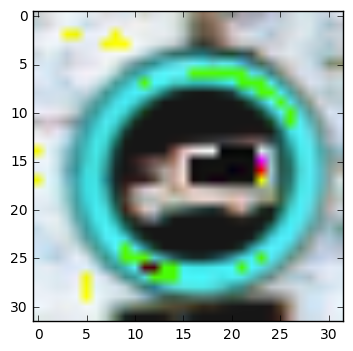

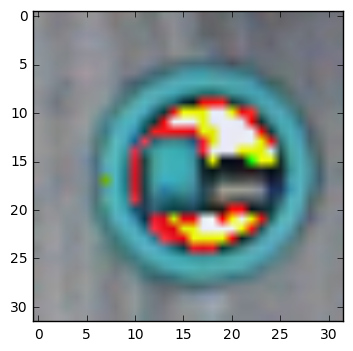

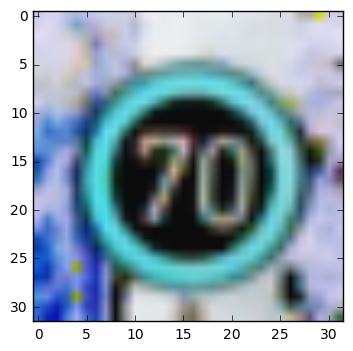

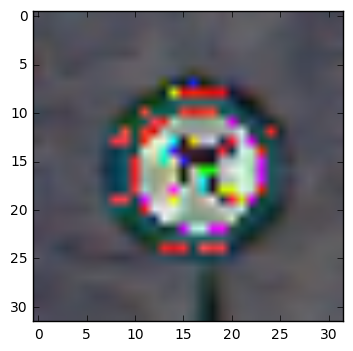

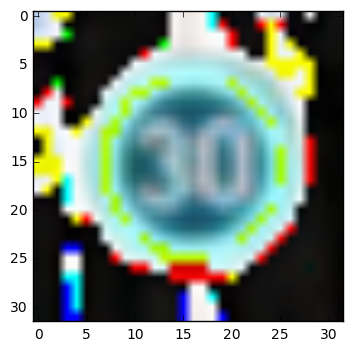

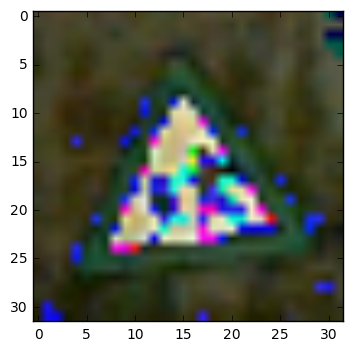

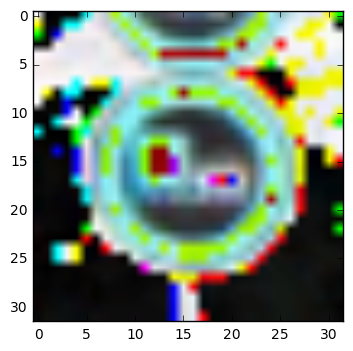

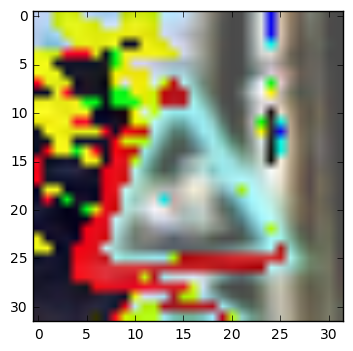

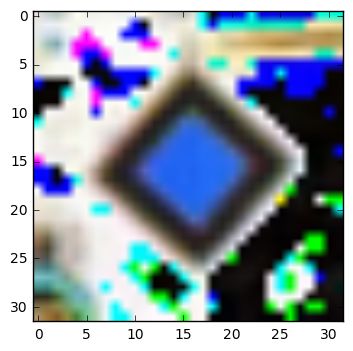

In [15]:
for i in range(10):
    plt.figure(i)
    plt.imshow(X_train[i].squeeze())
    print(y_train[i])

In [16]:
X_validation_normal=[]
for i in range(len(X_validation)):
    X_validation_normal.append(normalize(X_validation[i]))
X_validation=X_validation_normal

In [17]:
X_test_normal=[]
for i in range(len(X_test)):
    X_test_normal.append(normalize(X_test[i]))
X_test=X_test_normal

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
* The 1st step is shuffle. The 2nd step is normalization.
* Min-Max normalization is adopted:
* Let $z_i$ is the normalized value of $x_i.$ Then, $$z_i=\frac{255(x_i-x_{\rm min})}{(x_{\rm max}-x_{\rm min})}$$

* From data exploration, I noticed that some of the images are good, but some of them are too dark or low contrast. Therefore, I would like to increase the contrast for low ones. Using min-max normalization can not only increase the brightness for dark ones, but also increase the contrast for low contrast images.

In [18]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** Using a standard cross validation approach, I set 80% of the original data as training and the remaining 20% are reserved for validation. I let the original test dataset for testing without modification.

In [19]:
import tensorflow as tf

EPOCHS = 40
BATCH_SIZE = 128  #128

In [20]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [21]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [22]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** 
* I used the LeNet model. The input images are 32×32 in size with 3 channels (32x32x3). 
* There are 6-layers in the convnet
* Layer C1 is a convolution layer with 6 feature maps and a 5×5 kernel for each feature map.
* Layer S2 is a subsampling layer with 6 feature maps and a 2×2 kernel for each feature map.
* Layer C3 is a convolution layer with 16 feature maps and a 6×6 kernel for each feature map.
* Layer S4 is a subsampling layer with 16 feature maps and a 2×2 kernel for each feature map.
* Layer C5 is a convolution layer with 120 feature maps and a 6×6 kernel for each feature map.
* Layer C6 is a fully connected layer with 120 inputs and 43 outputs.
* (ref: http://eblearn.sourceforge.net/beginner_tutorial2_train.html)

## Training

In [23]:
### Train your model here.
### Feel free to use as many code cells as needed.

In [24]:
#rate = 0.002 # test accuracy =0.866
#rate = 0.001 # test accuracy =0.891
#rate = 0.0005 # test accuracy =0.899
rate = 0.0007 # test accuracy =0.907

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [25]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))

In [26]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
label_prediction = tf.argmax(logits, 1) # I add this! For Question #7
top_k_prediction = tf.nn.top_k(tf.nn.softmax(logits), k=5) # I add this! For Question #8
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()




def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / (num_examples)
def predict(X_data):  # I add this function! For Question #7
    num_examples = len(X_data)
    #total_accuracy = 0
    sess = tf.get_default_session()    
    pred = sess.run(label_prediction, feed_dict={x: X_data})
    return pred
def topkpredict(X_data):  # I add this function! For Question #8
    num_examples = len(X_data)
    #total_accuracy = 0
    sess = tf.get_default_session()    
    topkpred = sess.run(top_k_prediction, feed_dict={x: X_data})
    return topkpred

In [27]:
with tf.Session() as sess:
    #sess.run(tf.global_variables_initializer())
    sess.run(tf.initialize_all_variables())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.530

EPOCH 2 ...
Validation Accuracy = 0.692

EPOCH 3 ...
Validation Accuracy = 0.802

EPOCH 4 ...
Validation Accuracy = 0.856

EPOCH 5 ...
Validation Accuracy = 0.863

EPOCH 6 ...
Validation Accuracy = 0.900

EPOCH 7 ...
Validation Accuracy = 0.912

EPOCH 8 ...
Validation Accuracy = 0.904

EPOCH 9 ...
Validation Accuracy = 0.905

EPOCH 10 ...
Validation Accuracy = 0.865

EPOCH 11 ...
Validation Accuracy = 0.924

EPOCH 12 ...
Validation Accuracy = 0.907

EPOCH 13 ...
Validation Accuracy = 0.948

EPOCH 14 ...
Validation Accuracy = 0.945

EPOCH 15 ...
Validation Accuracy = 0.955

EPOCH 16 ...
Validation Accuracy = 0.955

EPOCH 17 ...
Validation Accuracy = 0.955

EPOCH 18 ...
Validation Accuracy = 0.962

EPOCH 19 ...
Validation Accuracy = 0.962

EPOCH 20 ...
Validation Accuracy = 0.939

EPOCH 21 ...
Validation Accuracy = 0.959

EPOCH 22 ...
Validation Accuracy = 0.954

EPOCH 23 ...
Validation Accuracy = 0.962

EPOCH 24 ...
Validation Accura

In [28]:
with tf.Session() as sess:
    tf.initialize_all_variables().run()
    saver.restore(sess, 'lenet')
    test_accuracy = evaluate(X_test, y_test)
    print("test_accuracy = {:.3f}".format(test_accuracy))
    print()

test_accuracy = 0.900



### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** I train my model using the following parameters:
* type of optimizer: adam 
* batch size: 128 
* epochs: 40
* training rate: 0.0007
* hyperparameters: $\mu =0$, $\sigma =0.1$

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** Basically, there are at least four steps to come up with a solution to this problem:
* Data pre-processing: From data exploration, I noticed that some of the images are good, but some of them are too dark or low contrast. Therefore, I would like to increase the contrast for low ones. Using min-max normalization can not only increase the brightness for dark ones, but also increase the contrast for low contrast images.
* Determine the model: among the typical deep models, I chose the LeNet-5 model. LeNet-5 can be used to classify MNIST problem well. I feel traffic sign recognition is similar to MNIST because they are all image classification problems. Although traffic sign classification problem has more classes (labels). I guess this model maybe also acceptable. So, I adopt LeNet-5 first, if not ok, I will adopt other model to try.
* Adapt the structure of the model: for traffic sign recognition, the LeNet-5 should be revised. It is not a difficult problem.
* tuning the parameters: there are many parameters need to be tuned, including learning rate, epoches, batch size, and hyperparameters, etc.
* improve the above steps: test the performance, if it is not ok, redo the above steps.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [29]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

In [30]:
from skimage.io import imread

In [31]:
mydata=[]
img=imread('t0.jpg')
mydata.append(img)
img=imread('t1.jpg')
mydata.append(img)
img=imread('t2.jpg')
mydata.append(img)
img=imread('t3.jpg')
mydata.append(img)
img=imread('t4.jpg')
mydata.append(img)

Check the data shape here!

In [32]:
np.shape(mydata)

(5, 32, 32, 3)

Preview captured images here!

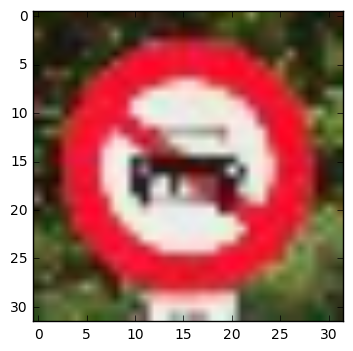

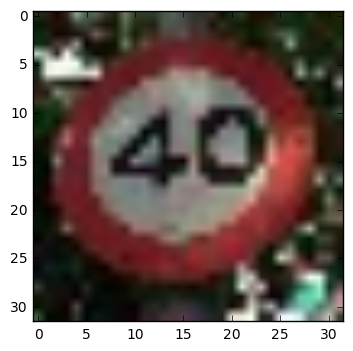

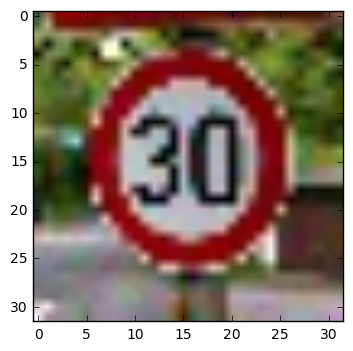

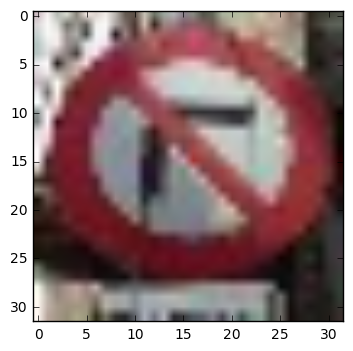

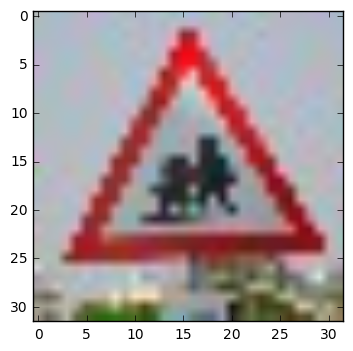

In [33]:
for i in range(5):
    plt.figure(i)
    plt.imshow(mydata[i].squeeze())

### Normalization

In [34]:
mydata_normal=[]
for i in range(len(mydata)):
    mydata_normal.append(normalize(mydata[i]))
mydata=mydata_normal

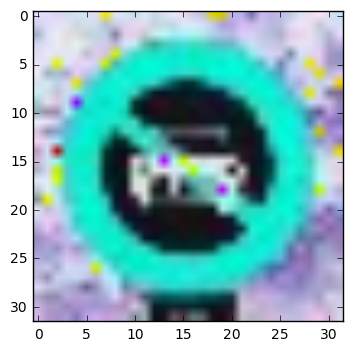

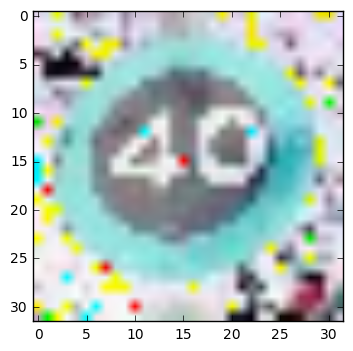

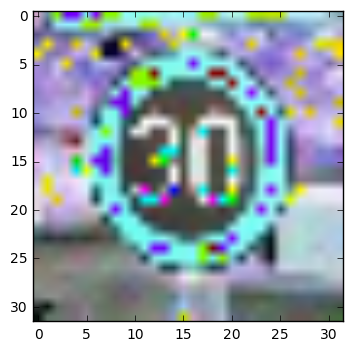

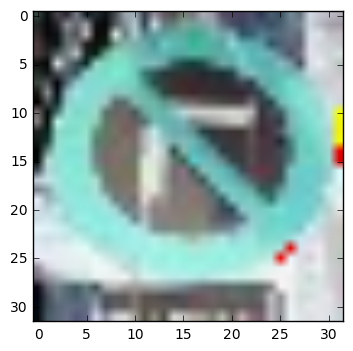

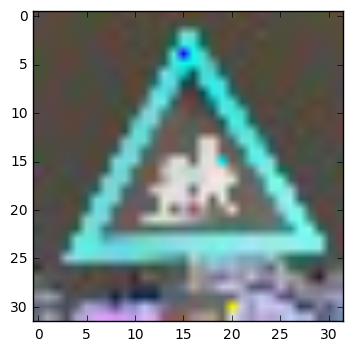

In [35]:
for i in range(5):
    plt.figure(i)
    plt.imshow(mydata[i].squeeze())

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** 
* These traffic signs are taken from Taiwan. Maybe these symbols are different from the German ones.
* The provided training data have no "Speed limit (40km/h)", but my pictures have one of that.
* The five pictures are: No vechiles (label ID=15), Speed limit (40km/h) (label ID=unknown), Speed limit (30km/h) (label ID=1), no turn right (label ID=unknown), and Children crossing (label ID=28).
* I guess the performance cannot better than 60%, because there are two images with unknown ID. Later, I will set unknown ID as 99.

In [36]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

In [37]:
np.shape(mydata)

(5, 32, 32, 3)

In [38]:
mylabels=[15,99,1,99,28]  # "99" means unknown ID

In [39]:
with tf.Session() as sess:
    tf.initialize_all_variables().run()
    saver.restore(sess, 'lenet')
    test_accuracy = evaluate(mydata, mylabels)
    print("accuracy = {:.3f}".format(test_accuracy))
    print()

accuracy = 0.400



In [40]:
with tf.Session() as sess:
    tf.initialize_all_variables().run()
    saver.restore(sess, 'lenet')
    pred = predict(mydata)
    print(pred)
    print()

[10 23  1  1 28]



### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
* No, my model cannot perform equally well on captured pictures.
* The accuracy of captured images is 0.40. (If we don't consider the images with unknown IDs, the accuracy can be 0.667)
* However, on the other hand, the accuracy of provided test data is 0.900

In [41]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

In [42]:
with tf.Session() as sess:
    tf.initialize_all_variables().run()
    saver.restore(sess, 'lenet')
    pred = topkpredict(mydata)
    print(pred)
    print()

TopKV2(values=array([[  1.00000000e+00,   4.60119196e-08,   7.97384914e-09,
          5.14208187e-09,   4.53478644e-11],
       [  8.62227798e-01,   1.36973679e-01,   2.59098771e-04,
          2.27776094e-04,   1.16665629e-04],
       [  9.99994636e-01,   4.53617486e-06,   3.86902741e-07,
          2.06985519e-07,   2.02463923e-07],
       [  9.18480575e-01,   3.34554017e-02,   3.09647024e-02,
          1.22880656e-02,   2.28140666e-03],
       [  9.99304771e-01,   6.50770206e-04,   4.34487956e-05,
          8.91129673e-07,   1.43426419e-07]], dtype=float32), indices=array([[10, 16,  9,  7,  2],
       [23,  9, 16, 20,  3],
       [ 1,  0,  5, 18,  2],
       [ 1, 18, 25,  4,  2],
       [28, 11, 20, 30,  7]], dtype=int32))



### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** As below:

|Image|Correct ID|1st|2nd|3rd|4th|5th|
| :--------: |:-------------:|:-----|:------------- |:-------------| :-----| :-----|
|![alt text](t0.jpg)|15|1.0000|0.0000|0.0000|0.0000|0.0000|
|![alt text](t1.jpg)|99|0.8622|0.1370|0.0000|0.0000|0.0000|
|![alt text](t2.jpg)|1|1.0000|0.0000|0.0000|0.0000|0.0000|
|![alt text](t3.jpg)|99|0.9190|0.0335|0.0310|0.0123|0.0020|
|![alt text](t4.jpg)|28|0.9993|0.0007|0.0000|0.0000|0.0000|


|Image|Correct ID|1st|2nd|3rd|4th|5th|
| :--------: |:-------------:| -----:| -------------: |-------------:| -----:| -----:|
|![alt text](t0.jpg)|15|10|16|9|7|2|
|![alt text](t1.jpg)|99|23|9|16|20|3|
|![alt text](t2.jpg)|1|1|0|5|18|2|
|![alt text](t3.jpg)|99|1|18|25|4|2|
|![alt text](t4.jpg)|28|28|11|20|30|7||


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.